<a href="https://colab.research.google.com/github/lgiesen/forest-height/blob/main/forest_height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)
root_path = 'drive/MyDrive/Colab Notebooks/data/'

Mounted at /content/drive


## Data Exploration

- Understand data format
- Get a visual impression of the data

In [2]:
path_images = root_path + 'images/'
path_masks = root_path + 'masks/'

In [3]:
from os.path import isfile, join
def get_files(dir):
  from os import listdir
  onlyfiles = [f for f in listdir(dir) if isfile(join(dir, f))]
  print(onlyfiles)
get_files(dir = root_path + 'images/')

['image_000.npy', 'image_001.npy', 'image_002.npy', 'image_003.npy', 'image_004.npy', 'image_005.npy', 'image_006.npy', 'image_007.npy', 'image_008.npy', 'image_009.npy', 'image_010.npy', 'image_011.npy', 'image_012.npy', 'image_013.npy', 'image_014.npy', 'image_015.npy', 'image_016.npy', 'image_017.npy', 'image_018.npy', 'image_019.npy']


In [4]:
def path_exists(path):
  import os
  return os.path.exists(root_path + path)

In [5]:
import numpy as np
# load exemplary data
sat_path = 'images/image_004.npy'
if path_exists(sat_path):
  satellite = np.load(root_path + sat_path)
  print('satellite:',satellite.shape)
mask_path = 'masks/mask_004.npy'
if path_exists(mask_path):
  mask = np.load(root_path + mask_path)
  mask.shape
  print('mask:',satellite.shape)

satellite: (10, 1024, 1024)
mask: (10, 1024, 1024)


In [6]:
import matplotlib.pyplot as plt
def plot_img(img, is_satellite = True):
    #shape: satellite == (10, 1024, 1024), mask == (1, 1024, 1024)
    if is_satellite:
      # Extract Red, Green, and Blue bands
      red = img[2, :, :]
      green = img[1, :, :]
      blue = img[0, :, :]

      # Normalize the bands to [0, 1] range
      red_norm = (red - red.min()) / (red.max() - red.min())
      green_norm = (green - green.min()) / (green.max() - green.min())
      blue_norm = (blue - blue.min()) / (blue.max() - blue.min())
    
      # Stack the bands to create an RGB image
      scaled_img = np.stack((red_norm, green_norm, blue_norm), axis=-1)
    
    elif not is_satellite:
      scaled_img = (mask - np.min(mask)) / (np.amax(mask) - np.amin(mask))
      # TODO: scale with total max and min of all masks for comparability
      scaled_img = np.squeeze(scaled_img) # remove redundant dimension
      
      
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(scaled_img)
    plt.axis('off')
    plt.show()

satellite: complete


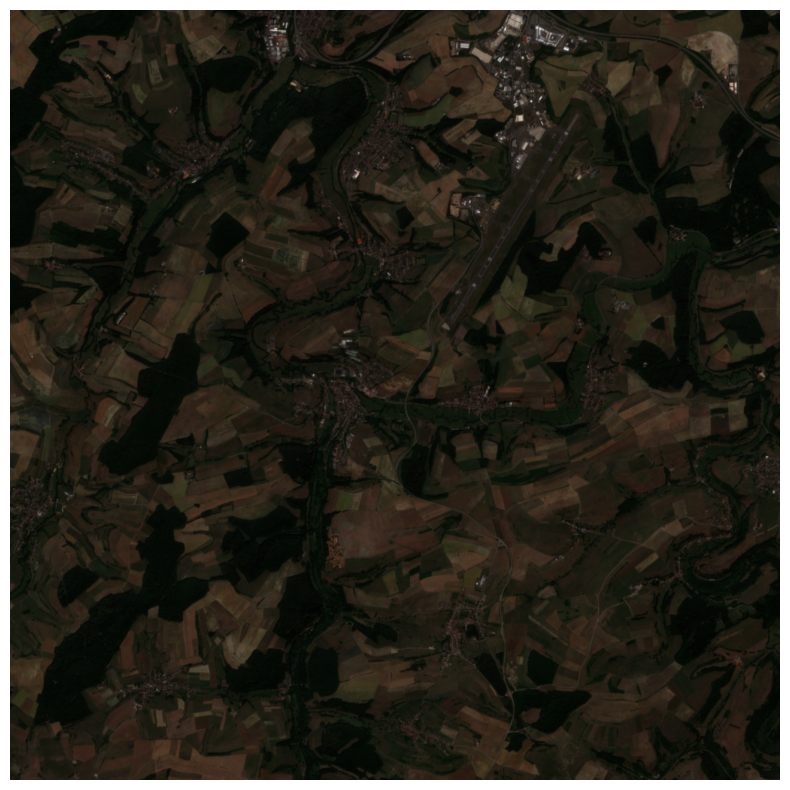

mask: complete


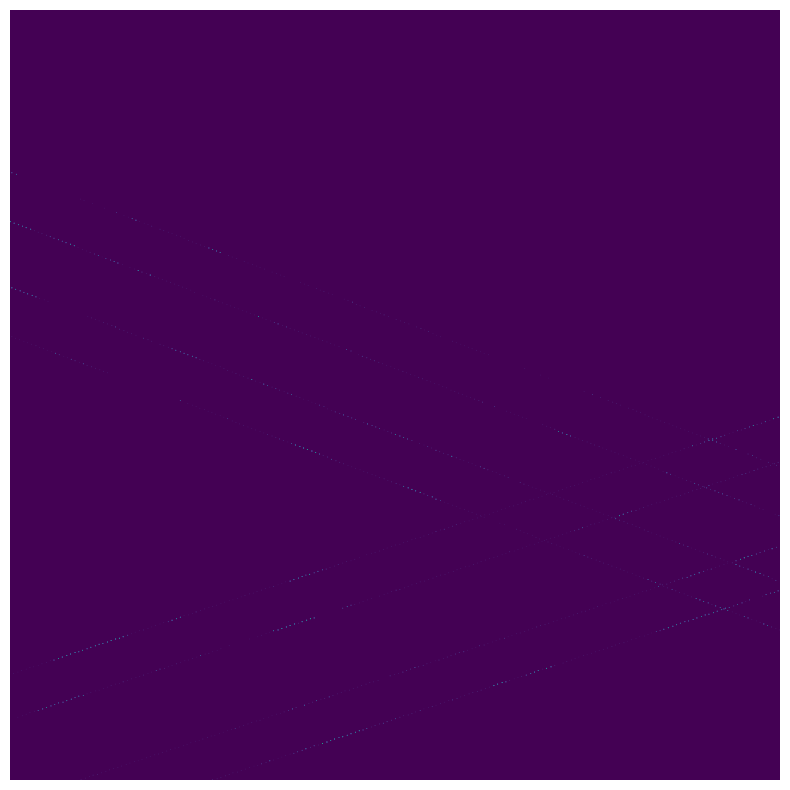

satellite: zoomed in


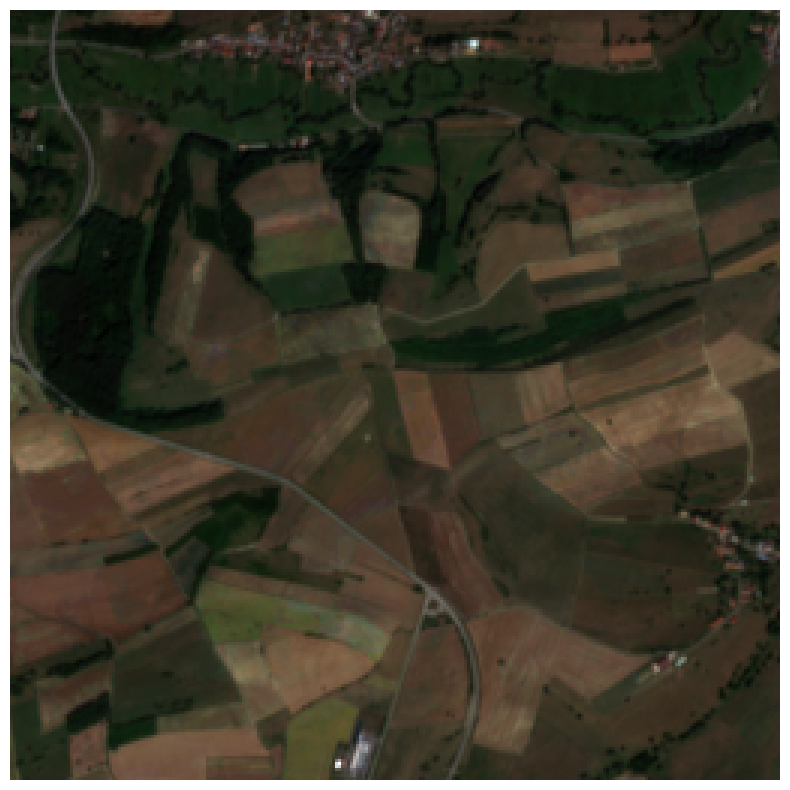

mask: zoomed in


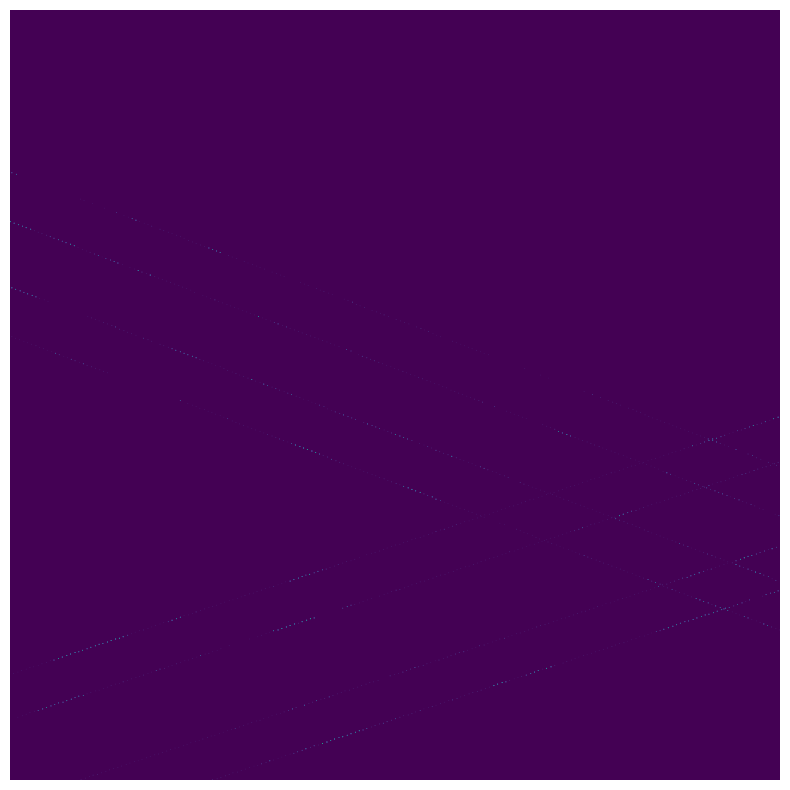

In [7]:
print("satellite: complete")
plot_img(satellite)
print("mask: complete")
plot_img(mask, is_satellite = False)
print("satellite: zoomed in")
plot_img(satellite[:,512:768,512:768])
print("mask: zoomed in")
plot_img(mask[:,512:768,512:768], is_satellite = False)

In [8]:
import matplotlib.pyplot as plt
def plot_mask_img(mask):
    
    scaled_img = (mask - np.min(mask)) / (np.amax(mask) - np.amin(mask))
    scaled_img = np.squeeze(scaled_img)
    # (mask - np.min(mask)) / (np.amax(mask) - np.amin(mask))
    # TODO: scale with total max and min of all masks for comparability

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(scaled_img)
    plt.axis('off')
    plt.show()

mask: complete


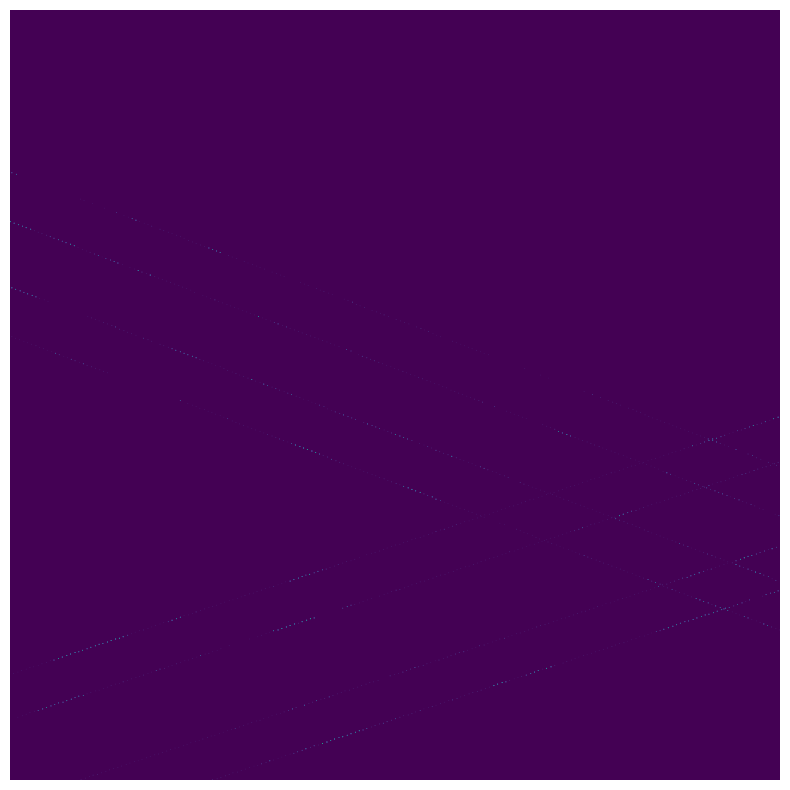

mask: zoomed in


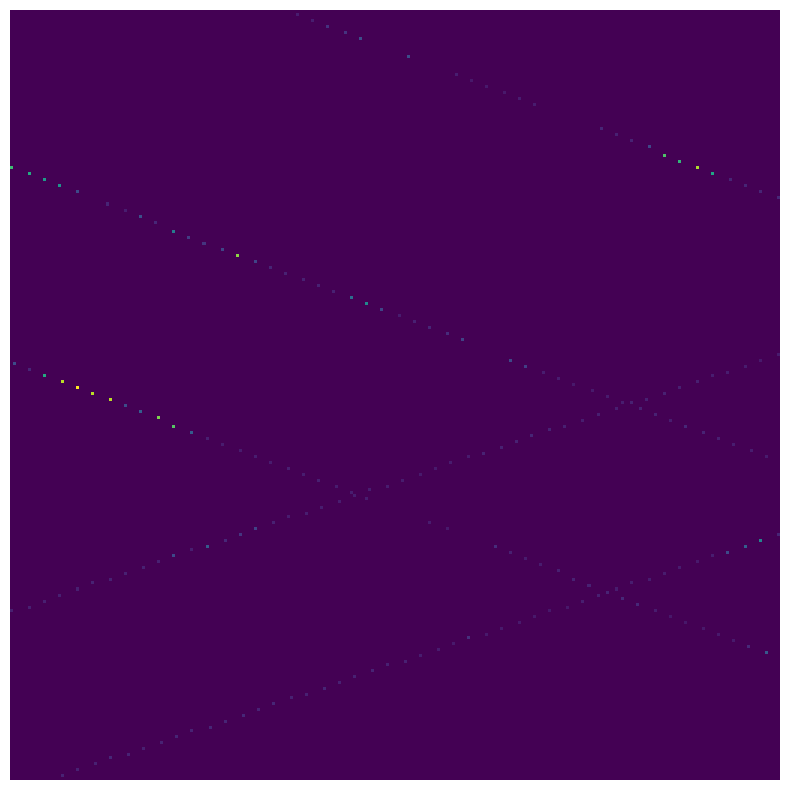

In [9]:
print("mask: complete")
plot_mask_img(mask)
print("mask: zoomed in")
plot_mask_img(mask[:,512:768,512:768])

The mask seems to have little dots of values, but not an area of trees, which is usual for a forest. Is that a case of low data quality or is the type of visualization faulty?

## Data Preparation

The npy files are combined into a dataset. After the first loading they do not have to be generated anymore.
One npy file might need to be split into smaller images of 256x256 or 512x512 pixels, which then are put back together in the end.

In [11]:
# create data sets by combining npy files
path_train_sat = root_path + "train_satellite.npy"
path_train_masks = root_path + "train_masks.npy"

from os import listdir
if not isfile(path_train_sat):
  print("train satellite dataset is generated")
  # image set
  # initialize with the first satellite image
  train_satellite = np.load(path_images + listdir(path_images)[0])
  # concatinate all other images
  for f in listdir(path_images)[1:]:
      current_array = np.load(path_images + f, allow_pickle=True)
      train_satellite = np.concatenate((train_satellite, current_array), axis=0)
  # adjust incorrect shape: (200, 1024, 1024)
  train_satellite = train_satellite.reshape(20, 10, 1024, 1024)
  # save as file
  np.save(path_train_sat, train_satellite, allow_pickle=True, fix_imports=True)
if not isfile(path_train_masks):
  print("train masks dataset is generated")
  # masks
  # initialize with the first mask image
  train_masks = np.load(path_masks + listdir(path_masks)[0])
  # concatinate all other images
  for f in listdir(path_masks)[1:]:
      current_array = np.load(path_masks + f, allow_pickle=True)
      train_masks = np.concatenate((train_masks, current_array), axis=0)
  # save as file
  np.save(root_path + "train_masks.npy", train_masks, allow_pickle=True, fix_imports=True)

In [12]:
# remove drive connection as it is no longer needed
drive.flush_and_unmount()

To Do:

- Data Augmentation (flip image at least by 90, 180 and 270°)

## Training

### Machine Learning Regressor



Suggestions based on [SciKits advice](https://scikit-learn.org/stable/_static/ml_map.png) on choosing the right model:
- RidgeRegression
- SVR(kernel='linear')
- SVR(kernel='rbf')
- EnsembleRegressors

### Convolutional Neural Network (CNN)

## Evaluation